# Decision Tree / Random Forest / KNN / Logistics Regression / SVM


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, accuracy_score
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn import metrics

pd.set_option("display.max_columns",  None)

In [2]:
# Load the assignment csv file
dataset = pd.read_csv("assign.csv")

# 1.0 Data Exploration and Visualisation


### 1.1 Data Exploration
The dataset.head show the first 10 samples of the assign.csv file

In [3]:
# first 10 samples
dataset.head(10) 

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
1,39,blue-collar,married,middle,yes,no,nov,NaN,124,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,False
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1,False
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0,False
5,48,services,divorced,primary,yes,no,jun,phone,122,1,999,0,1.4,94.465,-41.8,4.961,5228.1,False
6,46,blue-collar,married,primary,yes,no,nov,cell,416,2,999,0,-0.1,93.200,-42.0,4.120,5195.8,False
7,33,self-employed,single,university,no,no,nov,phone,168,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,False
8,43,services,married,high,no,no,apr,cell,60,1,999,1,-1.8,93.075,-47.1,1.410,5099.1,False
9,41,blue-collar,married,middle,no,yes,apr,cell,351,1,999,0,-1.8,93.075,-47.1,1.405,5099.1,False


In [4]:
# x2 - x8 are categorical data
# x1 & x9 - x16 are numerical data
# output y is categorical data
# missing value ('x8' - 6 values & 'x14' - 8 values)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  int64  
 1   x2      40000 non-null  object 
 2   x3      40000 non-null  object 
 3   x4      40000 non-null  object 
 4   x5      40000 non-null  object 
 5   x6      40000 non-null  object 
 6   x7      40000 non-null  object 
 7   x8      39994 non-null  object 
 8   x9      40000 non-null  int64  
 9   x10     40000 non-null  int64  
 10  x11     40000 non-null  int64  
 11  x12     40000 non-null  int64  
 12  x13     40000 non-null  float64
 13  x14     39992 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     40000 non-null  float64
 16  x17     40000 non-null  float64
 17  y       40000 non-null  bool   
dtypes: bool(1), float64(5), int64(5), object(7)
memory usage: 5.2+ MB


In [5]:
dataset.describe()

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39992.000000,40000.000000,40000.000000,40000.000000
mean,40.012200,258.721825,2.566375,962.110625,0.173075,0.081885,93.576081,-40.501567,3.621611,5167.021655
std,10.416123,260.258055,2.771441,187.806197,0.495758,1.570986,0.578954,4.627286,1.734336,72.249786
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 1.2 Visualisation

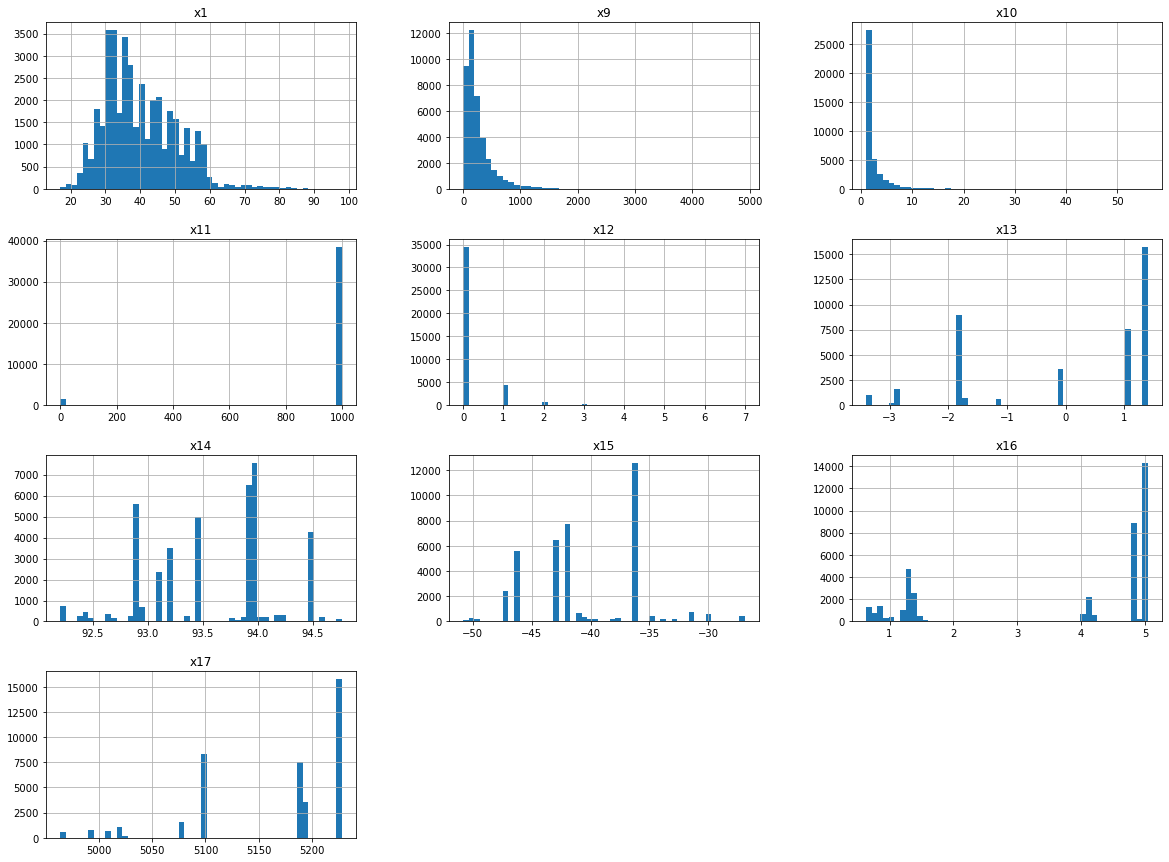

In [6]:
dataset.hist(bins =50, figsize = (20,15))
plt.show()

In [7]:
dataset["x2"].value_counts()

admin            10130
blue-collar       8995
technician        6565
services          3843
management        2837
retired           1666
entrepreneur      1406
self-employed     1387
housemaid         1025
unemployed         984
student            843
unknown            319
Name: x2, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x2'>

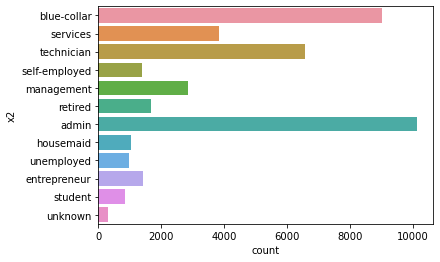

In [8]:
sns.countplot(y = dataset["x2"], data = dataset)

In [9]:
dataset["x3"].value_counts()

married     24172
single      11270
divorced     4480
unknown        78
Name: x3, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x3'>

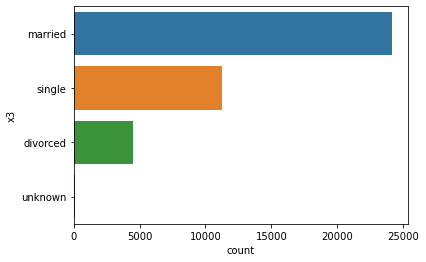

In [10]:
sns.countplot(y = dataset["x3"], data = dataset)

In [11]:
dataset["x4"].value_counts()

university      11820
high             9254
primary          6289
middle           5856
professional     5080
unknown          1684
illiterate         17
Name: x4, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x4'>

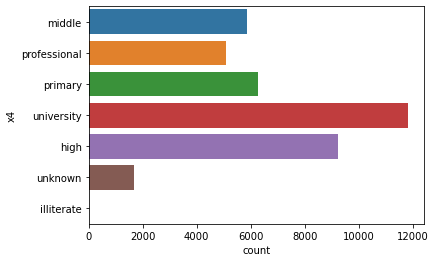

In [12]:
sns.countplot(y = dataset["x4"], data = dataset)

In [13]:
dataset["x5"].value_counts()

yes        20952
no         18086
unknown      962
Name: x5, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x5'>

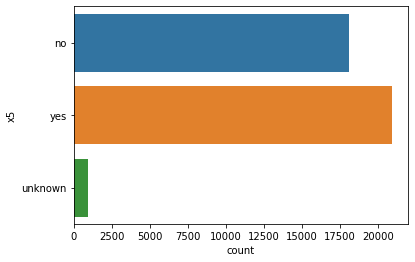

In [14]:
sns.countplot(y = dataset["x5"], data = dataset)

In [15]:
dataset["x6"].value_counts()

no         32936
yes         6102
unknown      962
Name: x6, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x6'>

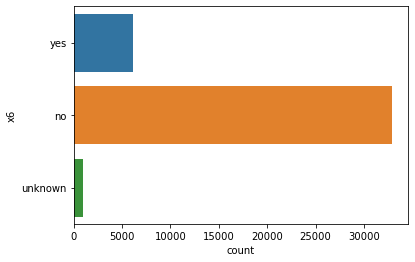

In [16]:
sns.countplot(y = dataset["x6"], data = dataset)

In [17]:
dataset["x7"].value_counts()

may    13393
jul     6967
aug     5978
jun     5172
nov     3988
apr     2545
oct      696
sep      553
mar      532
dec      176
Name: x7, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x7'>

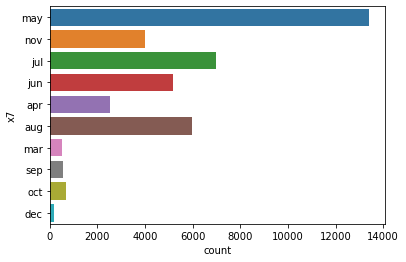

In [18]:
sns.countplot(y = dataset["x7"], data = dataset)

In [19]:
dataset["x8"].value_counts()

cell     25356
phone    14638
Name: x8, dtype: int64

<AxesSubplot:xlabel='count', ylabel='x8'>

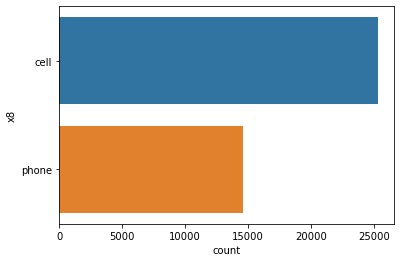

In [20]:
sns.countplot(y = dataset["x8"], data = dataset)

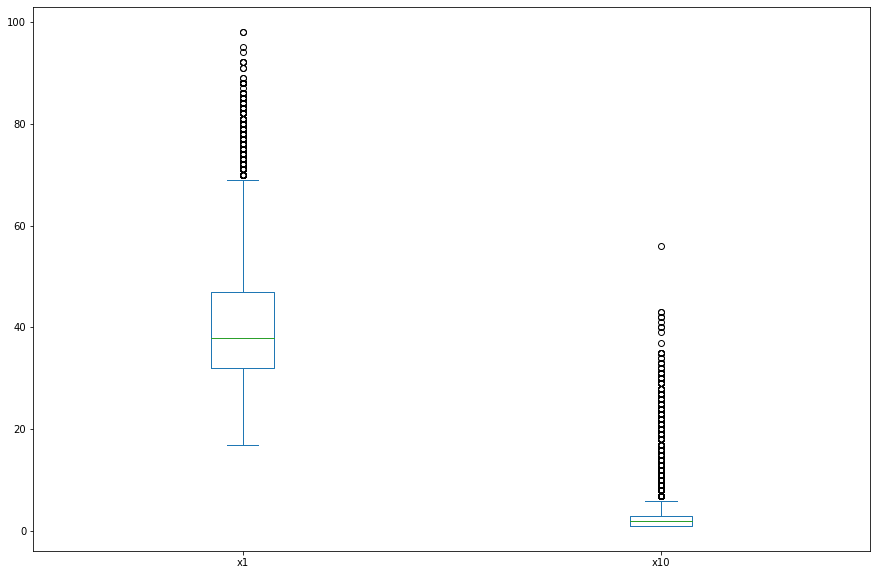

In [21]:
#Use Boxplot to show the outlier in each numerical data
outlier = dataset[["x1", "x10"]]
outlier.plot(kind = "box", figsize = (15,10))
plt.show()

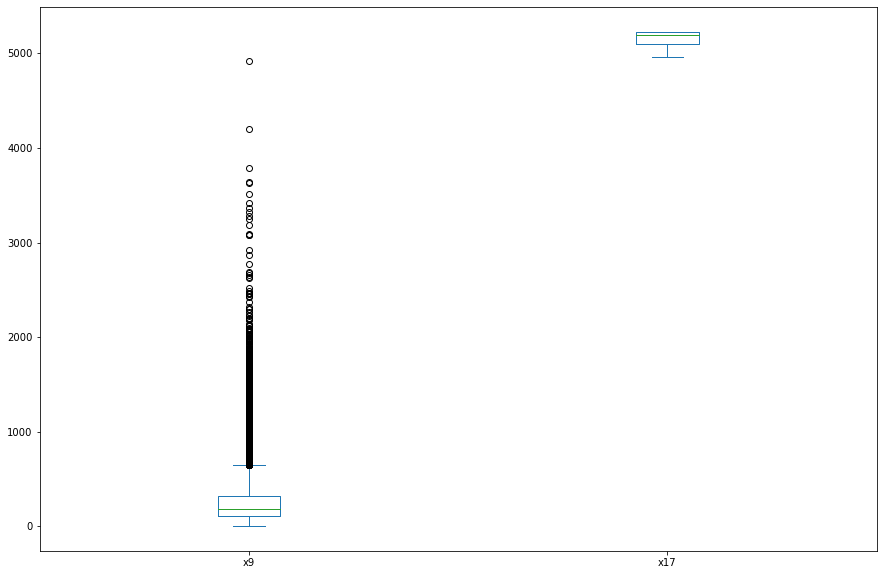

In [22]:
outlier2 = dataset[["x9", "x17"]]
outlier2.plot(kind = "box", figsize = (15,10))
plt.show()

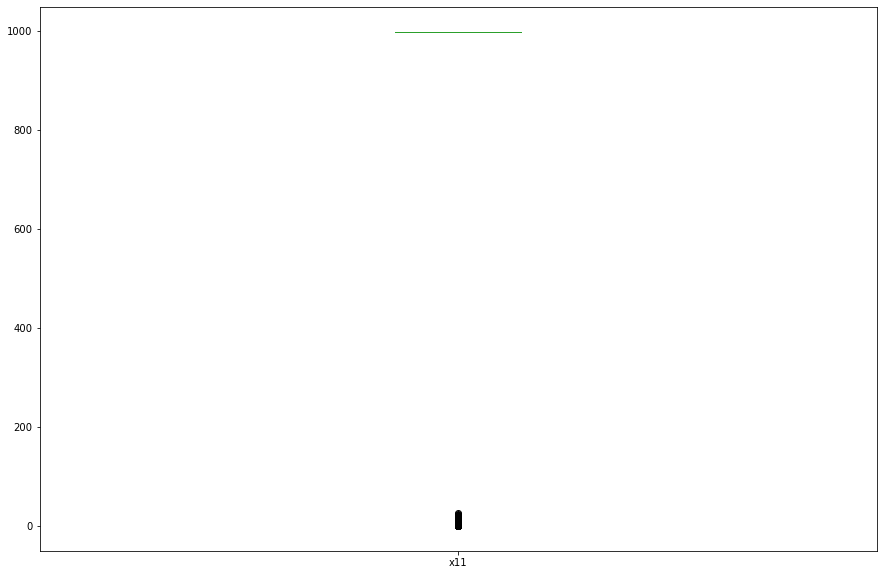

In [23]:
outlier3 = dataset[["x11"]]
outlier3.plot(kind = "box", figsize = (15,10))
plt.show()

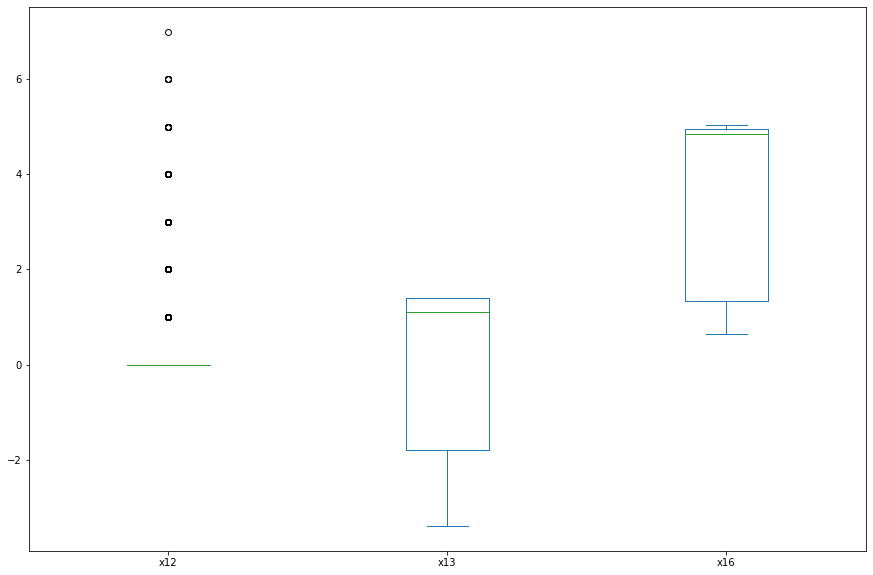

In [24]:
outlier4 = dataset[["x12", "x13", "x16"]]
outlier4.plot(kind = "box", figsize = (15,10))
plt.show()

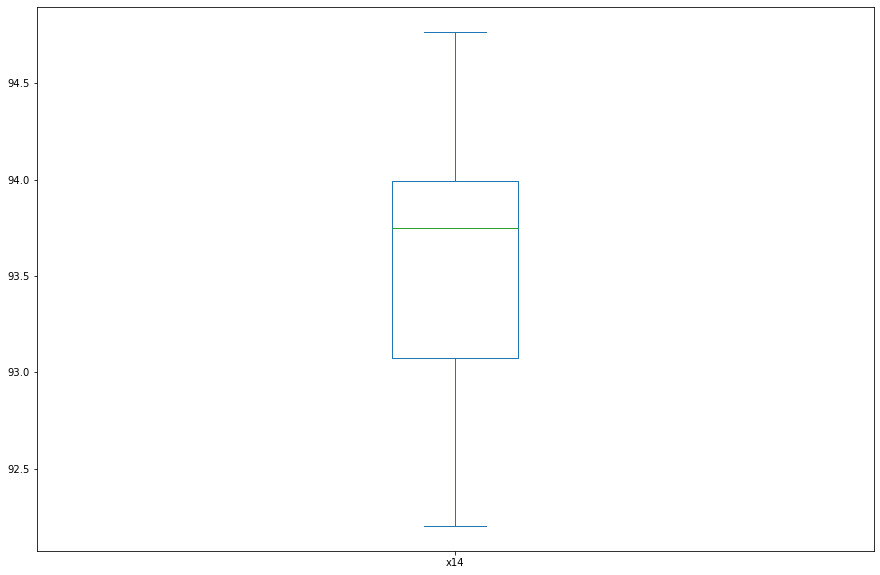

In [25]:
outlier6 = dataset[["x14"]]
outlier6.plot(kind = "box", figsize = (15,10))
plt.show()

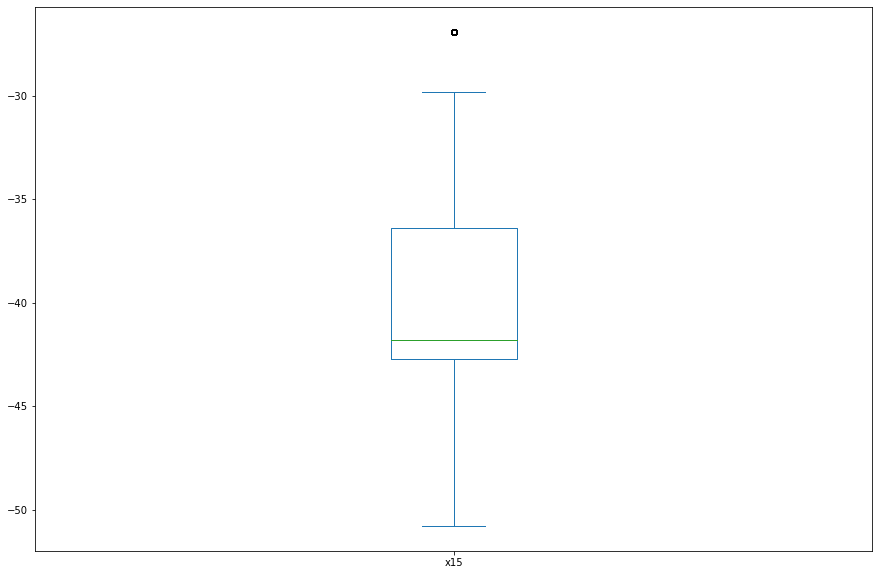

In [26]:
outlier6 = dataset[["x15"]]
outlier6.plot(kind = "box", figsize = (15,10))
plt.show()

# 2.0 Data Preprocessing

### 2.1 Handle Missing Value

In [27]:
# Calculate IQR to identify outliers & Remove the outliers
dataset = dataset[(dataset["x1"] <= 69.5) & (dataset["x9"] <= 647) & (dataset["x10"] <= 6) 
            & (dataset["x11"] == 999) & dataset["x12"] == 0 & (dataset["x15"] <= -26.95)]

In [28]:
# Show how many missing value are there
dataset.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     5
x9     0
x10    0
x11    0
x12    0
x13    0
x14    8
x15    0
x16    0
x17    0
y      0
dtype: int64

In [29]:
# Drop the rows with "unknown" values for x5, x6
dataset = dataset[dataset.x5 != "unknown"]
dataset = dataset[dataset.x6 != "unknown"]

In [30]:
# Split the input features to x, and output prediction to y
x = dataset.drop("y", axis = 1)
y = dataset["y"]

In [31]:
# Split the x into numeric & categorical 
x_num = x.drop(["x2", "x3", "x4", "x5", "x6", "x7", "x8"], axis = 1)
x_cat = x[["x2", "x3", "x4", "x5", "x6", "x7", "x8"]]

In [32]:
# Dealing with categorical dataset first

#  Replce the rows with "unknown" values for x2 to "admin"
x_cat["x2"].replace("unknown", "admin", inplace = True)

#  Replce the rows with "unknown" values for x3 to "married"
x_cat["x3"].replace("unknown", "married", inplace = True)

#  Replce the rows with "unknown" values for x4 to "university"
x_cat["x4"].replace("unknown", "university", inplace = True)

# Fill in the missing values for x8 to "cell"
x_cat["x8"].fillna("cell", inplace = True)

C:\Users\Chen Si Yang\AppData\Local\Temp\ipykernel_10804\684007331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat["x2"].replace("unknown", "admin", inplace = True)
C:\Users\Chen Si Yang\AppData\Local\Temp\ipykernel_10804\684007331.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat["x3"].replace("unknown", "married", inplace = True)
C:\Users\Chen Si Yang\AppData\Local\Temp\ipykernel_10804\684007331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [33]:
# Checking for x2 & x3 & x4 & x5 & x6 & x7 & x8
print("'Column x2'\n",x_cat["x2"].value_counts() , "\n\n")
print("'Column x3'\n",x_cat["x3"].value_counts() , "\n\n")
print("'Column x4'\n",x_cat["x4"].value_counts() , "\n\n")
print("'Column x5'\n",x_cat["x5"].value_counts() , "\n\n")
print("'Column x6'\n",x_cat["x6"].value_counts() , "\n\n")
print("'Column x7'\n",x_cat["x7"].value_counts() , "\n\n")
print("'Column x8'\n",x_cat["x8"].value_counts() , "\n\n")

'Column x2'
 admin            9383
blue-collar      8065
technician       5927
services         3408
management       2515
retired          1528
entrepreneur     1248
self-employed    1233
housemaid         948
unemployed        883
student           717
Name: x2, dtype: int64 


'Column x3'
 married     21895
single       9970
divorced     3990
Name: x3, dtype: int64 


'Column x4'
 university      12145
high             8196
primary          5711
middle           5218
professional     4569
illiterate         16
Name: x4, dtype: int64 


'Column x5'
 yes    19136
no     16719
Name: x5, dtype: int64 


'Column x6'
 no     30261
yes     5594
Name: x6, dtype: int64 


'Column x7'
 may    11620
jul     6766
aug     5701
jun     4894
nov     3226
apr     1997
oct      583
sep      463
mar      462
dec      143
Name: x7, dtype: int64 


'Column x8'
 cell     21862
phone    13993
Name: x8, dtype: int64 




In [34]:
# Check the missing value of x_cat is gone
x_cat.isnull().sum()

x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64

In [35]:
# Dealing with numeric dataset 
imputer = SimpleImputer(strategy = "median")
imputer.fit(x_num)

x_num_tr = imputer.transform(x_num)

In [36]:
# Checking the missing value in numeric value
x_num_tr_pd = pd.DataFrame(x_num_tr, columns = x_num.columns)
x_num_tr_pd.isnull().sum()

x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

### 2.2 Preprocessing Numerical Data: Standardization

In [37]:
scaler = StandardScaler(copy=False)
x_num_tr = scaler.fit_transform(x_num_tr)

print('>>> Mean of all columns:\n', x_num_tr.mean(axis=0))
print('\n>>> Std of all columns:\n', x_num_tr.std(axis=0))

>>> Mean of all columns:
 [-2.89726253e-16 -4.87501082e-17 -3.81974933e-17 -1.15731964e-16
 -1.66463784e-17  2.35823694e-17  4.31319555e-15 -1.51531586e-15
 -3.22028154e-16  3.39843742e-15]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 2.3 Preprocessing Categorical Data: One-hot Encoding

In [38]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35855 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x2      35855 non-null  object
 1   x3      35855 non-null  object
 2   x4      35855 non-null  object
 3   x5      35855 non-null  object
 4   x6      35855 non-null  object
 5   x7      35855 non-null  object
 6   x8      35855 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


In [39]:
# Encode each categorical feature into its one-hot representation using the Scikit-Learn library LabelBinarizer
lb_encoder_2 = LabelBinarizer()
x_cat_x2 = lb_encoder_2.fit_transform(x_cat["x2"])

lb_encoder_3 = LabelBinarizer()
x_cat_x3 = lb_encoder_3.fit_transform(x_cat["x3"])

lb_encoder_4 = LabelBinarizer()
x_cat_x4 = lb_encoder_4.fit_transform(x_cat["x4"])

lb_encoder_5 = LabelBinarizer()
x_cat_x5 = lb_encoder_5.fit_transform(x_cat["x5"])

lb_encoder_6 = LabelBinarizer()
x_cat_x6 = lb_encoder_6.fit_transform(x_cat["x6"])

lb_encoder_7 = LabelBinarizer()
x_cat_x7 = lb_encoder_7.fit_transform(x_cat["x7"])

lb_encoder_8 = LabelBinarizer()
x_cat_x8 = lb_encoder_8.fit_transform(x_cat["x8"])

In [40]:
print('Possible values of x2:\n', lb_encoder_2.classes_)
print('\nPossible values of x3:\n', lb_encoder_3.classes_)
print('\nPossible values of x4:\n', lb_encoder_4.classes_)
print('\nPossible values of x5:\n', lb_encoder_5.classes_)
print('\nPossible values of x6:\n', lb_encoder_6.classes_)
print('\nPossible values of x7:\n', lb_encoder_7.classes_)
print('\nPossible values of x8:\n', lb_encoder_8.classes_)

Possible values of x2:
 ['admin' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']

Possible values of x3:
 ['divorced' 'married' 'single']

Possible values of x4:
 ['high' 'illiterate' 'middle' 'primary' 'professional' 'university']

Possible values of x5:
 ['no' 'yes']

Possible values of x6:
 ['no' 'yes']

Possible values of x7:
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']

Possible values of x8:
 ['cell' 'phone']


In [41]:
# Get the columns name
x_cat_x2_pd = pd.DataFrame(x_cat_x2, columns = lb_encoder_2.classes_)
x_cat_x3_pd = pd.DataFrame(x_cat_x3, columns = lb_encoder_3.classes_)
x_cat_x4_pd = pd.DataFrame(x_cat_x4, columns = lb_encoder_4.classes_)
x_cat_x5_pd = pd.DataFrame(x_cat_x5, columns = ['x5'])
x_cat_x6_pd = pd.DataFrame(x_cat_x6, columns = ['x6'])
x_cat_x7_pd = pd.DataFrame(x_cat_x7, columns = lb_encoder_7.classes_)
x_cat_x8_pd = pd.DataFrame(x_cat_x8, columns = ['x8'])
x_columns_name = x_num_tr_pd.columns
x_columns_name = x_columns_name.append(x_cat_x2_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x3_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x4_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x5_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x6_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x7_pd.columns) 
x_columns_name = x_columns_name.append(x_cat_x8_pd.columns) 
x_columns_name

Index(['x1', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
       'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'divorced', 'married', 'single', 'high', 'illiterate',
       'middle', 'primary', 'professional', 'university', 'x5', 'x6', 'apr',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'x8'],
      dtype='object')

### 3.3 Finalizing the Dataset

In [42]:
x_tr = np.hstack([x_num_tr, x_cat_x2, x_cat_x3, x_cat_x4, x_cat_x5, x_cat_x6, x_cat_x7, x_cat_x8])
print('x_tr shape:', x_tr.shape)
print('y_train shape:', y.shape)

x_tr shape: (35855, 43)
y_train shape: (35855,)


### 3.4 Split the dataset into training and testing set

In [43]:
from sklearn.model_selection import train_test_split

x_train_tr, x_test_tr, y_train, y_test  = train_test_split(x_tr, y, test_size=0.2, random_state=30)
print ('full set shape=', x_tr.shape)
print ('train shape=', x_train_tr.shape)
print ('test shape=', x_test_tr.shape)
print ('train shape=', y_train.shape)
print ('test shape=', y_test.shape)

full set shape= (35855, 43)
train shape= (28684, 43)
test shape= (7171, 43)
train shape= (28684,)
test shape= (7171,)


### Imbalance Dataset
There are 25411 'False' result and 3273 'True' result. So, this is an unbalance dataset.

In [44]:
y_train.value_counts()

False    25411
True      3273
Name: y, dtype: int64

# 3.0 Select and Train a Model

## Model #1: Decision Tree Classifier model

### Before Resampling

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train_tr, y_train)
y_tree = tree_clf.predict(x_train_tr)

In [46]:
train_acc = accuracy_score(y_tree, y_train)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 1.0000


In [47]:
# Perform confusion matrix
cm = confusion_matrix (y_train, y_tree)
print(cm)

[[25411     0]
 [    0  3273]]


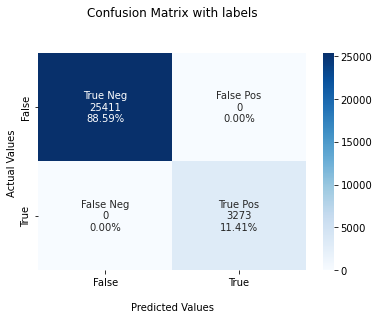

In [48]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [49]:
# When the prediction is all false the accuracy is still high
y_train_pred = tree_clf.predict(x_train_tr)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(x_train_tr), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 1.0
Accuracy using prediction values: 0.8858945753730303


### Perform cross-validated prediction

In [50]:
k_scores = cross_val_score(tree_clf, x_train_tr, y_train, cv=5, scoring='accuracy')
k_scores

array([0.88216838, 0.89367265, 0.89018651, 0.89419557, 0.89016736])

In [51]:
y_tree_cv = cross_val_predict(tree_clf, x_train_tr, y_train, cv=5)
cm = confusion_matrix(y_train, y_tree_cv)
print(cm)

[[23828  1583]
 [ 1570  1703]]


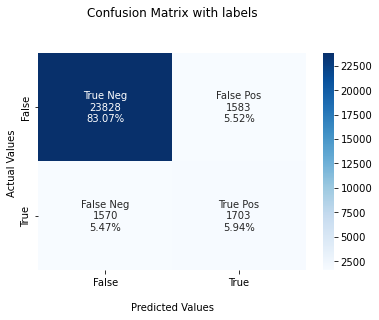

In [52]:
roup_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [53]:
# Measure the Accuracy, Precision, Recall and f1 score
print('Decision Tree Model')
print('Accuracy  = {:.4f}'.format(accuracy_score(y_train, y_tree_cv)))
print('Precision = {:.4f}'.format(precision_score(y_train, y_tree_cv)))
print('Recall    = {:.4f}'.format(recall_score (y_train, y_tree_cv)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_tree_cv)))

Decision Tree Model
Accuracy  = 0.8901
Precision = 0.5183
Recall    = 0.5203
f1 score  = 0.5193


### After Resampling

In [54]:
# We perform smote for balancing the dataset
smote = SMOTE(random_state= 27)
x_train_smote, y_train_smote = smote.fit_resample(x_train_tr, y_train)
print("Before resampling: ", Counter(y_train))
print("After resampling: ", Counter(y_train_smote))

Before resampling:  Counter({False: 25411, True: 3273})
After resampling:  Counter({True: 25411, False: 25411})


In [55]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train_smote, y_train_smote)
y_tree_smote = tree_clf.predict(x_train_smote)

train_acc = accuracy_score(y_train_smote, y_tree_smote)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 1.0000


In [56]:
# Using the imblearn pipeline
imba_pipeline_tree = make_pipeline(SMOTE(random_state=42), DecisionTreeClassifier(random_state=42))

#Calculate the accrucay, recall, precision and f1 score
tree_clf_accuracy = cross_val_score(imba_pipeline_tree, x_train_tr, y_train, scoring='accuracy', cv=5)
tree_clf_recall = cross_val_score(imba_pipeline_tree, x_train_tr, y_train, scoring='recall', cv=5)
tree_clf_precision = cross_val_score(imba_pipeline_tree, x_train_tr, y_train, scoring='precision', cv=5)
tree_clf_f1 = cross_val_score(imba_pipeline_tree, x_train_tr, y_train, scoring='f1', cv=5)

print("Recall Score   : ", tree_clf_accuracy)
print("Recall Score   : ", tree_clf_recall)
print("Precision Score: ", tree_clf_precision)
print("f1 Score       : ", tree_clf_f1)

Recall Score   :  [0.88303992 0.88059962 0.89088374 0.88548022 0.8833682 ]
Recall Score   :  [0.59541985 0.6        0.5648855  0.59480122 0.62844037]
Precision Score:  [0.48994975 0.48161765 0.52039381 0.49807939 0.49103943]
f1 Score       :  [0.5375603  0.53433039 0.54172767 0.54216028 0.55130785]


### Compare before and after resampling

In [57]:
# Measure the Accuracy, Precision, Recall and f1 score
y_tree_smote_cv = cross_val_predict(imba_pipeline_tree, x_train_tr, y_train, cv=5)

print("            Before perform SMOTE | After perform SMOTE")
print('Accuracy  =         {:.4f}       |        {:.4f}'.format(accuracy_score(y_train, y_tree_cv), accuracy_score(y_train, y_tree_smote_cv)))
print('Precision =         {:.4f}       |        {:.4f}'.format(precision_score(y_train, y_tree_cv), precision_score(y_train, y_tree_smote_cv)))
print('Recall    =         {:.4f}       |        {:.4f}'.format(recall_score (y_train, y_tree_cv), recall_score (y_train, y_tree_smote_cv)))
print('f1 score  =         {:.4f}       |        {:.4f}'.format(f1_score(y_train, y_tree_cv), f1_score(y_train, y_tree_smote_cv)))

            Before perform SMOTE | After perform SMOTE
Accuracy  =         0.8901       |        0.8847
Precision =         0.5183       |        0.4956
Recall    =         0.5203       |        0.5967
f1 score  =         0.5193       |        0.5414


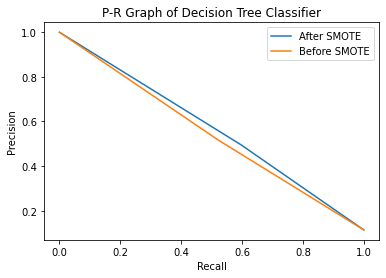

In [58]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_tree_smote_cv)
plt.plot(recalls,precisions,label="After SMOTE")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_tree_cv)
plt.plot(recalls,precisions,label="Before SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph of Decision Tree Classifier")
plt.legend()

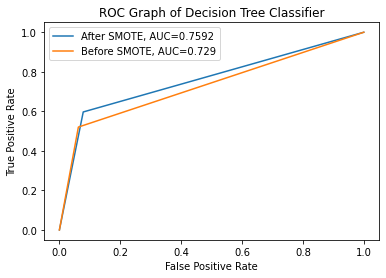

In [59]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_tree_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_tree_smote_cv), 4)
plt.plot(fpr,tpr,label="After SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_tree_cv)
auc = round(metrics.roc_auc_score(y_train, y_tree_cv), 4)
plt.plot(fpr,tpr,label="Before SMOTE, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph of Decision Tree Classifier")
plt.legend()

## Model #2: Random Forest Classifier Model

### Before Resampling

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier (n_estimators = 60, random_state = 42)
forest_clf.fit(x_train_tr, y_train)
y_forest = forest_clf.predict(x_train_tr)

In [61]:
train_acc = accuracy_score(y_forest, y_train)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9999


In [62]:
# Perform confusion matrix
cm = confusion_matrix (y_train, y_forest)
print(cm)

[[25411     0]
 [    2  3271]]


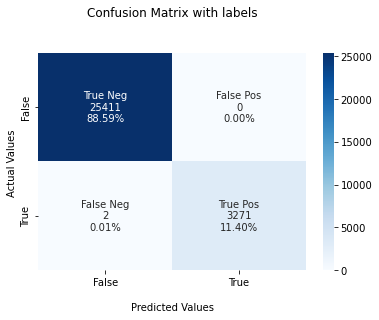

In [63]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [64]:
# When the prediction is all false the accuracy is still high
y_train_pred = forest_clf.predict(x_train_tr)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(x_train_tr), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.9999302747176126
Accuracy using prediction values: 0.8858945753730303


### Perform cross-validated prediction

In [65]:
k_scores = cross_val_score(forest_clf, x_train_tr, y_train, cv=5, scoring='accuracy')
k_scores

array([0.91162629, 0.91162629, 0.9144152 , 0.91302074, 0.90829847])

In [66]:
y_forest_cv = cross_val_predict(forest_clf, x_train_tr, y_train, cv=5)
cm = confusion_matrix(y_train, y_forest_cv)
print(cm)

[[24531   880]
 [ 1650  1623]]


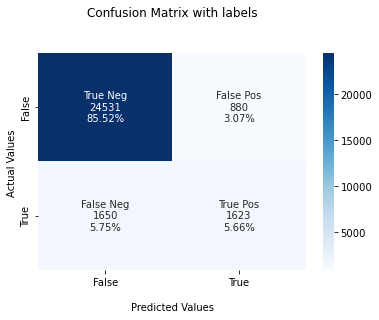

In [67]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [68]:
# Measure the Accuracy, Precision, Recall and f1 score
print('Random Forest Model')
print('Accuracy  = {:.4f}'.format(accuracy_score(y_train, y_forest_cv)))
print('Precision = {:.4f}'.format(precision_score(y_train, y_forest_cv)))
print('Recall    = {:.4f}'.format(recall_score (y_train, y_forest_cv)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_forest_cv)))

Random Forest Model
Accuracy  = 0.9118
Precision = 0.6484
Recall    = 0.4959
f1 score  = 0.5620


### After Resampling

In [69]:
forest_clf = RandomForestClassifier (n_estimators = 60, random_state = 42)
forest_clf.fit(x_train_smote, y_train_smote)
y_forest_smote = forest_clf.predict(x_train_smote)

train_acc = accuracy_score(y_train_smote, y_forest_smote)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 1.0000


In [70]:
# Using the imblearn pipeline
imba_pipeline_forest = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators = 60, random_state = 42))

#Calculate the accrucay, recall, precision and f1 score
forest_clf_accuracy = cross_val_score(imba_pipeline_forest, x_train_tr, y_train, scoring='accuracy', cv=5)
forest_clf_recall = cross_val_score(imba_pipeline_forest, x_train_tr, y_train, scoring='recall', cv=5)
forest_clf_precision = cross_val_score(imba_pipeline_forest, x_train_tr, y_train, scoring='precision', cv=5)
forest_clf_f1 = cross_val_score(imba_pipeline_forest, x_train_tr, y_train, scoring='f1', cv=5)

print("Recall Score   : ", forest_clf_accuracy)
print("Recall Score   : ", forest_clf_recall)
print("Precision Score: ", forest_clf_precision)
print("f1 Score       : ", forest_clf_f1)

Recall Score   :  [0.90064494 0.9095346  0.90691999 0.90674569 0.90184798]
Recall Score   :  [0.61832061 0.62900763 0.59389313 0.63149847 0.64678899]
Precision Score:  [0.55862069 0.59883721 0.59208524 0.58415842 0.5602649 ]
f1 Score       :  [0.58695652 0.61355175 0.5929878  0.60690669 0.60042583]


### Compare before and after resampling

In [71]:
# Measure the Accuracy, Precision, Recall and f1 score
y_forest_smote_cv = cross_val_predict(imba_pipeline_forest, x_train_tr, y_train, cv=5)

print("           Before perform SMOTE | After perform SMOTE")
print('Accuracy  =         {:.4f}      |        {:.4f}'.format(accuracy_score(y_train, y_forest_cv), accuracy_score(y_train, y_forest_smote_cv)))
print('Precision =         {:.4f}      |        {:.4f}'.format(precision_score(y_train, y_forest_cv), precision_score(y_train, y_forest_smote_cv)))
print('Recall    =         {:.4f}      |        {:.4f}'.format(recall_score (y_train, y_forest_cv), recall_score (y_train, y_forest_smote_cv)))
print('f1 score  =         {:.4f}      |        {:.4f}'.format(f1_score(y_train, y_forest_cv), f1_score(y_train, y_forest_smote_cv)))

           Before perform SMOTE | After perform SMOTE
Accuracy  =         0.9118      |        0.9051
Precision =         0.6484      |        0.5781
Recall    =         0.4959      |        0.6239
f1 score  =         0.5620      |        0.6001


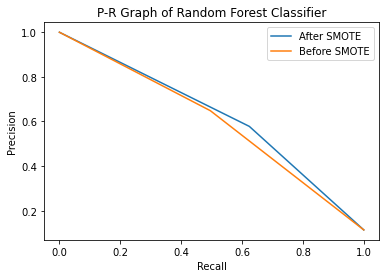

In [72]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_forest_smote_cv)
plt.plot(recalls,precisions,label="After SMOTE")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_forest_cv)
plt.plot(recalls,precisions,label="Before SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph of Random Forest Classifier")
plt.legend()

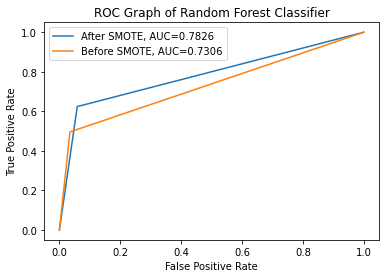

In [73]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_forest_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_forest_smote_cv), 4)
plt.plot(fpr,tpr,label="After SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_forest_cv)
auc = round(metrics.roc_auc_score(y_train, y_forest_cv), 4)
plt.plot(fpr,tpr,label="Before SMOTE, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph of Random Forest Classifier")
plt.legend()

## Model #3: K-Nearest Neighbors Model

### Before Resampling

In [74]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN_clf.fit(x_train_tr, y_train)
y_KNN = KNN_clf.predict(x_train_tr)

In [75]:
train_acc = accuracy_score(y_KNN, y_train)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9318


In [76]:
# Perform confusion matrix
cm = confusion_matrix (y_train, y_KNN)
print(cm)

[[24760   651]
 [ 1306  1967]]


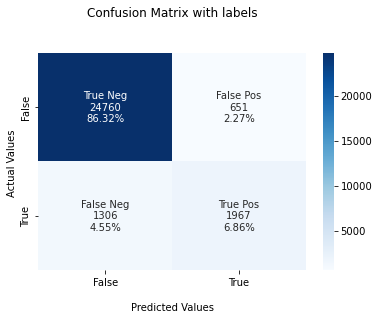

In [77]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [78]:
# When the prediction is all false the accuracy is still high
y_train_pred = KNN_clf.predict(x_train_tr)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(x_train_tr), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.9317738111839353
Accuracy using prediction values: 0.8858945753730303


### Perform cross-validated prediction

In [79]:
k_scores = cross_val_score(KNN_clf, x_train_tr, y_train, cv=5, scoring='accuracy')
k_scores

array([0.89715879, 0.90604846, 0.89942479, 0.90099355, 0.8945258 ])

In [80]:
y_KNN_cv = cross_val_predict(KNN_clf, x_train_tr, y_train, cv=5)
cm = confusion_matrix(y_train, y_KNN_cv)
print(cm)

[[24326  1085]
 [ 1794  1479]]


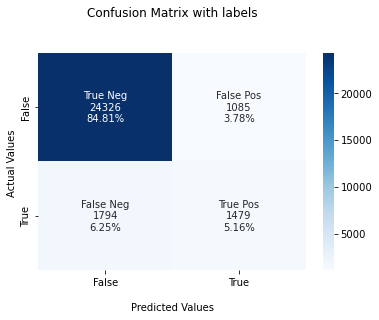

In [81]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [82]:
# Measure the Accuracy, Precision, Recall and f1 score
print('K-Nearest Neighbors Model')
print('Accuracy  = {:.4f}'.format(accuracy_score(y_train, y_KNN_cv)))
print('Precision = {:.4f}'.format(precision_score(y_train, y_KNN_cv)))
print('Recall    = {:.4f}'.format(recall_score (y_train, y_KNN_cv)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_KNN_cv)))

K-Nearest Neighbors Model
Accuracy  = 0.8996
Precision = 0.5768
Recall    = 0.4519
f1 score  = 0.5068


### After Resampling

In [83]:
KNN_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN_clf.fit(x_train_smote, y_train_smote)
y_KNN_smote = KNN_clf.predict(x_train_smote)

train_acc = accuracy_score(y_train_smote, y_KNN_smote)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9457


In [84]:
# Using the imblearn pipeline
imba_pipeline_KNN = make_pipeline(SMOTE(random_state=42), KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ))

#Calculate the accrucay, recall, precision and f1 score
KNN_clf_accuracy = cross_val_score(imba_pipeline_KNN, x_train_tr, y_train, scoring='accuracy', cv=5)
KNN_clf_recall = cross_val_score(imba_pipeline_KNN, x_train_tr, y_train, scoring='recall', cv=5)
KNN_clf_precision = cross_val_score(imba_pipeline_KNN, x_train_tr, y_train, scoring='precision', cv=5)
KNN_clf_f1 = cross_val_score(imba_pipeline_KNN, x_train_tr, y_train, scoring='f1', cv=5)

print("Recall Score   : ", KNN_clf_accuracy)
print("Recall Score   : ", KNN_clf_recall)
print("Precision Score: ", KNN_clf_precision)
print("f1 Score       : ", KNN_clf_f1)

Recall Score   :  [0.858114   0.86194875 0.86247168 0.858114   0.85634589]
Recall Score   :  [0.83206107 0.81374046 0.79694656 0.81804281 0.78899083]
Precision Score:  [0.43634908 0.44305902 0.44312394 0.43495935 0.42928453]
f1 Score       :  [0.57247899 0.5737352  0.5695581  0.56794055 0.55603448]


### Compare before and after resampling

In [85]:
# Measure the Accuracy, Precision, Recall and f1 score
y_KNN_smote_cv = cross_val_predict(imba_pipeline_KNN, x_train_tr, y_train, cv=5)

print("            Before perform SMOTE | After perform SMOTE")
print('Accuracy  =         {:.4f}       |        {:.4f}'.format(accuracy_score(y_train, y_KNN_cv), accuracy_score(y_train, y_KNN_smote_cv)))
print('Precision =         {:.4f}       |        {:.4f}'.format(precision_score(y_train, y_KNN_cv), precision_score(y_train, y_KNN_smote_cv)))
print('Recall    =         {:.4f}       |        {:.4f}'.format(recall_score (y_train, y_KNN_cv), recall_score (y_train, y_KNN_smote_cv)))
print('f1 score  =         {:.4f}       |        {:.4f}'.format(f1_score(y_train, y_KNN_cv), f1_score(y_train, y_KNN_smote_cv)))

            Before perform SMOTE | After perform SMOTE
Accuracy  =         0.8996       |        0.8594
Precision =         0.5768       |        0.4373
Recall    =         0.4519       |        0.8100
f1 score  =         0.5068       |        0.5680


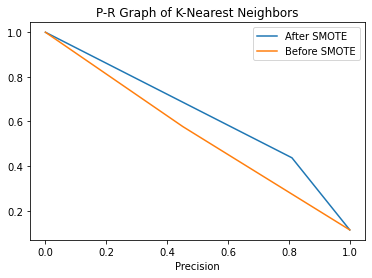

In [86]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_KNN_smote_cv)
plt.plot(recalls,precisions,label="After SMOTE")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_KNN_cv)
plt.plot(recalls,precisions,label="Before SMOTE")

plt.xlabel("Recall")
plt.xlabel("Precision")
plt.title("P-R Graph of K-Nearest Neighbors")
plt.legend()

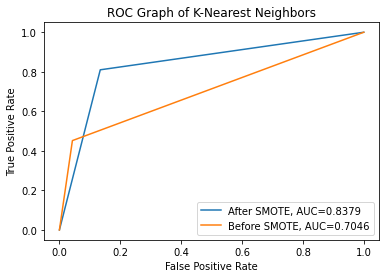

In [87]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_KNN_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_KNN_smote_cv), 4)
plt.plot(fpr,tpr,label="After SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_KNN_cv)
auc = round(metrics.roc_auc_score(y_train, y_KNN_cv), 4)
plt.plot(fpr,tpr,label="Before SMOTE, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph of K-Nearest Neighbors")
plt.legend()

## Model #4: Logistic Regression Model

### Before Resampling

In [88]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 50000)  
log_reg.fit(x_train_tr, y_train)
y_log = log_reg.predict(x_train_tr)

In [89]:
train_acc = accuracy_score(y_log, y_train)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9098


In [90]:
# Perform confusion matrix
cm = confusion_matrix (y_train, y_log)
print(cm)

[[24684   727]
 [ 1861  1412]]


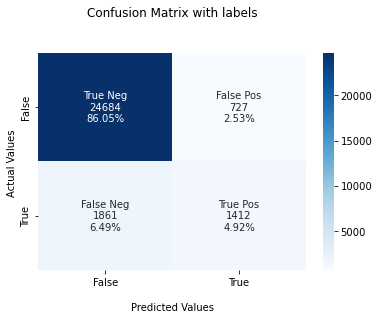

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [92]:
# When the prediction is all false the accuracy is still high
y_train_pred = log_reg.predict(x_train_tr)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(x_train_tr), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.9097754845907126
Accuracy using prediction values: 0.8858945753730303


### Perform cross-validated prediction

In [93]:
k_scores = cross_val_score(log_reg, x_train_tr, y_train, cv=5, scoring='accuracy')
k_scores

array([0.91092906, 0.90988321, 0.90726861, 0.91511243, 0.90550907])

In [94]:
y_log_cv = cross_val_predict(log_reg, x_train_tr, y_train, cv=5)
cm = confusion_matrix(y_train, y_log_cv)
print(cm)

[[24684   727]
 [ 1862  1411]]


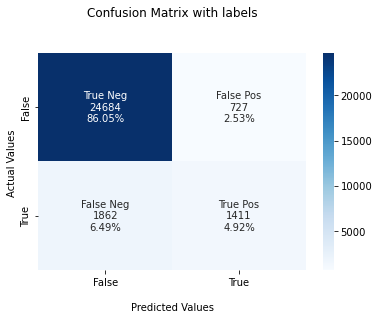

In [95]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [96]:
# Measure the Accuracy, Precision, Recall and f1 score
print('K-Nearest Neighbors Model')
print('Accuracy  = {:.4f}'.format(accuracy_score(y_train, y_log_cv)))
print('Precision = {:.4f}'.format(precision_score(y_train, y_log_cv)))
print('Recall    = {:.4f}'.format(recall_score (y_train, y_log_cv)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_log_cv)))

K-Nearest Neighbors Model
Accuracy  = 0.9097
Precision = 0.6600
Recall    = 0.4311
f1 score  = 0.5215


### After Resampling

In [97]:
log_reg = LogisticRegression(max_iter = 50000)  
log_reg.fit(x_train_smote, y_train_smote)
y_log_smote = log_reg.predict(x_train_smote)

train_acc = accuracy_score(y_train_smote, y_log_smote)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.8870


In [98]:
# Using the imblearn pipeline
imba_pipeline_log = make_pipeline(SMOTE(random_state=42), LogisticRegression(max_iter = 50000)  )

#Calculate the accrucay, recall, precision and f1 score
log_reg_accuracy = cross_val_score(imba_pipeline_log, x_train_tr, y_train, scoring='accuracy', cv=5)
log_reg_recall = cross_val_score(imba_pipeline_log, x_train_tr, y_train, scoring='recall', cv=5)
log_reg_precision = cross_val_score(imba_pipeline_log, x_train_tr, y_train, scoring='precision', cv=5)
log_reg_f1 = cross_val_score(imba_pipeline_log, x_train_tr, y_train, scoring='f1', cv=5)

print("Recall Score   : ", log_reg_accuracy)
print("Recall Score   : ", log_reg_recall)
print("Precision Score: ", log_reg_precision)
print("f1 Score       : ", log_reg_f1)

Recall Score   :  [0.85968276 0.87101272 0.86944396 0.87118703 0.8666318 ]
Recall Score   :  [0.89618321 0.89770992 0.86259542 0.89449541 0.87461774]
Precision Score:  [0.44335347 0.46629659 0.46160131 0.46613546 0.45577689]
f1 Score       :  [0.5932289  0.61377871 0.60138371 0.61288633 0.59926663]


### Compare before and after resampling

In [99]:
# Measure the Accuracy, Precision, Recall and f1 score
y_log_smote_cv = cross_val_predict(imba_pipeline_log, x_train_tr, y_train, cv=5)

print("       Before perform SMOTE | After perform SMOTE")
print('Accuracy  =         {:.4f}       |        {:.4f}'.format(accuracy_score(y_train, y_log_cv), accuracy_score(y_train, y_log_smote_cv)))
print('Precision =         {:.4f}       |        {:.4f}'.format(precision_score(y_train, y_log_cv), precision_score(y_train, y_log_smote_cv)))
print('Recall    =         {:.4f}       |        {:.4f}'.format(recall_score (y_train, y_log_cv), recall_score (y_train, y_log_smote_cv)))
print('f1 score  =         {:.4f}       |        {:.4f}'.format(f1_score(y_train, y_log_cv), f1_score(y_train, y_log_smote_cv)))

       Before perform SMOTE | After perform SMOTE
Accuracy  =         0.9097       |        0.8676
Precision =         0.6600       |        0.4585
Recall    =         0.4311       |        0.8851
f1 score  =         0.5215       |        0.6040


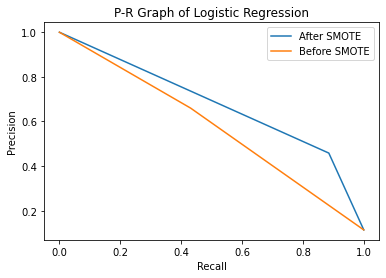

In [100]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_log_smote_cv)
plt.plot(recalls,precisions,label="After SMOTE")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_log_cv)
plt.plot(recalls,precisions,label="Before SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph of Logistic Regression")
plt.legend()

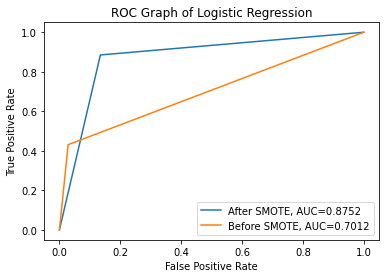

In [101]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_log_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_log_smote_cv), 4)
plt.plot(fpr,tpr,label="After SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_log_cv)
auc = round(metrics.roc_auc_score(y_train, y_log_cv), 4)
plt.plot(fpr,tpr,label="Before SMOTE, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph of Logistic Regression")
plt.legend()

## Model #5: Support Vector Classifier Model

### Before Resampling

In [102]:
from sklearn.svm import SVC
svc_clf = SVC(C=100.0)  
svc_clf.fit(x_train_tr, y_train)
y_svc = svc_clf.predict(x_train_tr)

In [103]:
train_acc = accuracy_score(y_svc, y_train)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9707


In [104]:
# Perform confusion matrix
cm = confusion_matrix (y_train, y_svc)
print(cm)

[[25224   187]
 [  653  2620]]


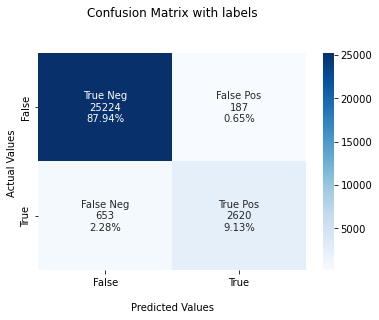

In [105]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [106]:
# When the prediction is all false the accuracy is still high
y_train_pred = svc_clf.predict(x_train_tr)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(x_train_tr), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.9707153813972946
Accuracy using prediction values: 0.8858945753730303


### Perform cross-validated prediction

In [107]:
k_scores = cross_val_score(svc_clf, x_train_tr, y_train, cv=5, scoring='accuracy')
k_scores

array([0.89698449, 0.90116786, 0.90169078, 0.90622276, 0.89435146])

In [108]:
y_svc_cv = cross_val_predict(svc_clf, x_train_tr, y_train, cv=5)
cm = confusion_matrix(y_train, y_svc_cv)
print(cm)

[[24205  1206]
 [ 1660  1613]]


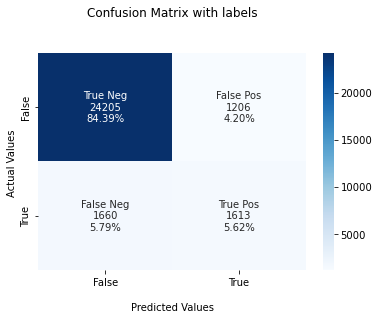

In [109]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [110]:
# Measure the Accuracy, Precision, Recall and f1 score
print('Support Vector Classifier Model')
print('Accuracy  = {:.4f}'.format(accuracy_score(y_train, y_svc_cv)))
print('Precision = {:.4f}'.format(precision_score(y_train, y_svc_cv)))
print('Recall    = {:.4f}'.format(recall_score (y_train, y_svc_cv)))
print('f1 score  = {:.4f}'.format(f1_score(y_train, y_svc_cv)))

Support Vector Classifier Model
Accuracy  = 0.9001
Precision = 0.5722
Recall    = 0.4928
f1 score  = 0.5295


### After Resampling

In [111]:
svc_clf = SVC(C=100.0)  
svc_clf.fit(x_train_smote, y_train_smote)
y_svc_smote = svc_clf.predict(x_train_smote)

train_acc = accuracy_score(y_train_smote, y_svc_smote)
print("Training accuracy: {:.4f}".format(train_acc))

Training accuracy: 0.9706


In [112]:
# Using the imblearn pipeline
imba_pipeline_svc = make_pipeline(SMOTE(random_state=42), SVC(C=100.0))

#Calculate the accrucay, recall, precision and f1 score
svc_clf_accuracy = cross_val_score(imba_pipeline_svc, x_train_tr, y_train, scoring='accuracy', cv=5)
svc_clf_recall = cross_val_score(imba_pipeline_svc, x_train_tr, y_train, scoring='recall', cv=5)
svc_clf_precision = cross_val_score(imba_pipeline_svc, x_train_tr, y_train, scoring='precision', cv=5)
svc_clf_f1 = cross_val_score(imba_pipeline_svc, x_train_tr, y_train, scoring='f1', cv=5)

print("Recall Score   : ", svc_clf_accuracy)
print("Recall Score   : ", svc_clf_recall)
print("Precision Score: ", svc_clf_precision)
print("f1 Score       : ", svc_clf_f1)

Recall Score   :  [0.88548022 0.88530591 0.88600314 0.89384696 0.88023013]
Recall Score   :  [0.61679389 0.60610687 0.58015267 0.63761468 0.56880734]
Precision Score:  [0.49876543 0.49811794 0.50065876 0.52851711 0.47876448]
f1 Score       :  [0.55153584 0.54683196 0.53748232 0.57796258 0.51991614]


### Compare before and after resampling

In [113]:
# Measure the Accuracy, Precision, Recall and f1 score
y_svc_smote_cv = cross_val_predict(imba_pipeline_svc, x_train_tr, y_train, cv=5)

print("            Before perform SMOTE | After perform SMOTE")
print('Accuracy  =         {:.4f}       |        {:.4f}'.format(accuracy_score(y_train, y_svc_cv), accuracy_score(y_train, y_svc_smote_cv)))
print('precision =         {:.4f}       |        {:.4f}'.format(precision_score(y_train, y_svc_cv), precision_score(y_train, y_svc_smote_cv)))
print('recall    =         {:.4f}       |        {:.4f}'.format(recall_score (y_train, y_svc_cv), recall_score (y_train, y_svc_smote_cv)))
print('f1 score  =         {:.4f}       |        {:.4f}'.format(f1_score(y_train, y_svc_cv), f1_score(y_train, y_svc_smote_cv)))

            Before perform SMOTE | After perform SMOTE
Accuracy  =         0.9001       |        0.8862
precision =         0.5722       |        0.5010
recall    =         0.4928       |        0.6019
f1 score  =         0.5295       |        0.5468


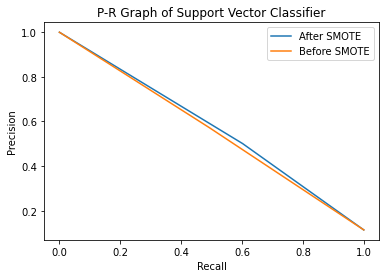

In [114]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_svc_smote_cv)
plt.plot(recalls,precisions,label="After SMOTE")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_svc_cv)
plt.plot(recalls,precisions,label="Before SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph of Support Vector Classifier")
plt.legend()

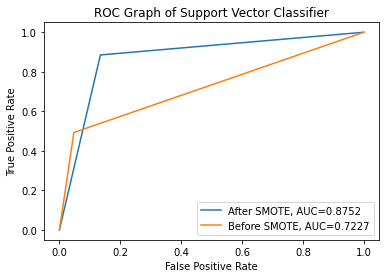

In [115]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_log_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_log_smote_cv), 4)
plt.plot(fpr,tpr,label="After SMOTE, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_svc_cv)
auc = round(metrics.roc_auc_score(y_train, y_svc_cv), 4)
plt.plot(fpr,tpr,label="Before SMOTE, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph of Support Vector Classifier")
plt.legend()

### Comparision of all the Result

In [116]:
# Compare the Accuracy, Precision, Recall and f1 score before resampling
print('           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier' )
print('Accuracy  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(accuracy_score(y_train, y_tree_cv), accuracy_score(y_train, y_forest_cv), accuracy_score(y_train, y_KNN_cv), accuracy_score(y_train, y_log_cv), accuracy_score(y_train, y_svc_cv)))
print('Precision =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(precision_score(y_train, y_tree_cv), precision_score(y_train, y_forest_cv), precision_score(y_train, y_KNN_cv), precision_score(y_train, y_log_cv), precision_score(y_train, y_svc_cv)))
print('Recall    =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(recall_score(y_train, y_tree_cv), recall_score(y_train, y_forest_cv), recall_score(y_train, y_KNN_cv), recall_score(y_train, y_log_cv), recall_score(y_train, y_svc_cv)))
print('f1 Score  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(f1_score(y_train, y_tree_cv), f1_score(y_train, y_forest_cv), f1_score(y_train, y_KNN_cv), f1_score(y_train, y_log_cv), f1_score(y_train, y_svc_cv)))


           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier
Accuracy  =     0.8901   |    0.9118     |        0.8996       |       0.9097        |          0.9001     
Precision =     0.5183   |    0.6484     |        0.5768       |       0.6600        |          0.5722     
Recall    =     0.5203   |    0.4959     |        0.4519       |       0.4311        |          0.4928     
f1 Score  =     0.5193   |    0.5620     |        0.5068       |       0.5215        |          0.5295     


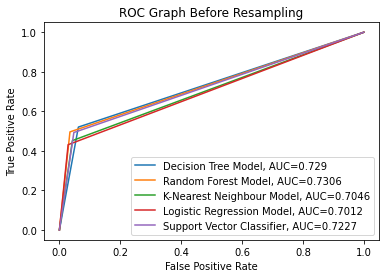

In [117]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_tree_cv)
auc = round(metrics.roc_auc_score(y_train, y_tree_cv), 4)
plt.plot(fpr,tpr,label="Decision Tree Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_forest_cv)
auc = round(metrics.roc_auc_score(y_train, y_forest_cv), 4)
plt.plot(fpr,tpr,label="Random Forest Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_KNN_cv)
auc = round(metrics.roc_auc_score(y_train, y_KNN_cv), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbour Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_log_cv)
auc = round(metrics.roc_auc_score(y_train, y_log_cv), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_svc_cv)
auc = round(metrics.roc_auc_score(y_train, y_svc_cv), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph Before Resampling")
plt.legend()

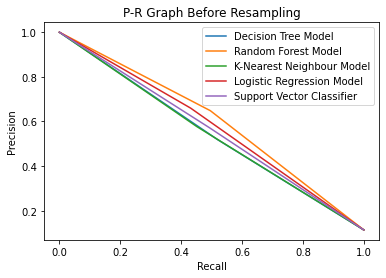

In [118]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_tree_cv)
plt.plot(recalls,precisions,label="Decision Tree Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_forest_cv)
plt.plot(recalls,precisions,label="Random Forest Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_KNN_cv)
plt.plot(recalls,precisions,label="K-Nearest Neighbour Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_log_cv)
plt.plot(recalls,precisions,label="Logistic Regression Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_svc_cv)
plt.plot(recalls,precisions,label="Support Vector Classifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph Before Resampling")
plt.legend()

In [119]:
# Compare the Accuracy, Precision, Recall and f1 score after resampling
print('           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier' )
print('Accuracy  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(accuracy_score(y_train, y_tree_smote_cv), accuracy_score(y_train, y_forest_smote_cv), accuracy_score(y_train, y_KNN_smote_cv), accuracy_score(y_train, y_log_smote_cv), accuracy_score(y_train, y_svc_smote_cv)))
print('Precision =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(precision_score(y_train, y_tree_smote_cv), precision_score(y_train, y_forest_smote_cv), precision_score(y_train, y_KNN_smote_cv), precision_score(y_train, y_log_smote_cv), precision_score(y_train, y_svc_smote_cv)))
print('Recall    =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(recall_score(y_train, y_tree_smote_cv), recall_score(y_train, y_forest_smote_cv), recall_score(y_train, y_KNN_smote_cv), recall_score(y_train, y_log_smote_cv), recall_score(y_train, y_svc_smote_cv)))
print('f1 Score  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(f1_score(y_train, y_tree_smote_cv), f1_score(y_train, y_forest_smote_cv), f1_score(y_train, y_KNN_smote_cv), f1_score(y_train, y_log_smote_cv), f1_score(y_train, y_svc_smote_cv)))

           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier
Accuracy  =     0.8847   |    0.9051     |        0.8594       |       0.8676        |          0.8862     
Precision =     0.4956   |    0.5781     |        0.4373       |       0.4585        |          0.5010     
Recall    =     0.5967   |    0.6239     |        0.8100       |       0.8851        |          0.6019     
f1 Score  =     0.5414   |    0.6001     |        0.5680       |       0.6040        |          0.5468     


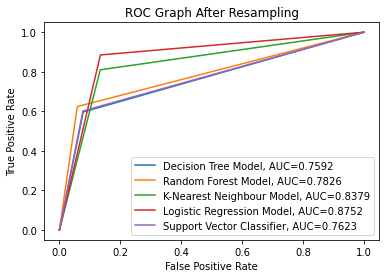

In [120]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_train, y_tree_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_tree_smote_cv), 4)
plt.plot(fpr,tpr,label="Decision Tree Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_forest_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_forest_smote_cv), 4)
plt.plot(fpr,tpr,label="Random Forest Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_KNN_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_KNN_smote_cv), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbour Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_log_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_log_smote_cv), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_train, y_svc_smote_cv)
auc = round(metrics.roc_auc_score(y_train, y_svc_smote_cv), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph After Resampling")
plt.legend()

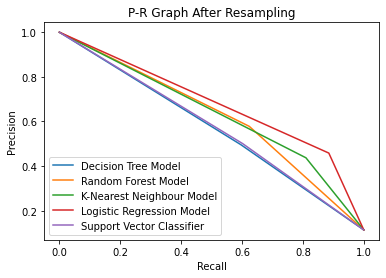

In [121]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_tree_smote_cv)
plt.plot(recalls,precisions,label="Decision Tree Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_forest_smote_cv)
plt.plot(recalls,precisions,label="Random Forest Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_KNN_smote_cv)
plt.plot(recalls,precisions,label="K-Nearest Neighbour Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_log_smote_cv)
plt.plot(recalls,precisions,label="Logistic Regression Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_train, y_svc_smote_cv)
plt.plot(recalls,precisions,label="Support Vector Classifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph After Resampling")
plt.legend()

### Evaluete the model on the test set
We test each model on the unseen data for ensuring the model is not overfitted and underfitted

In [122]:
imba_pipeline_tree.fit(x_train_tr,y_train)
y_tree_test = imba_pipeline_tree.predict(x_test_tr)

imba_pipeline_forest.fit(x_train_tr,y_train)
y_forest_test = imba_pipeline_forest.predict(x_test_tr)

imba_pipeline_KNN.fit(x_train_tr,y_train)
y_KNN_test = imba_pipeline_KNN.predict(x_test_tr)

imba_pipeline_log.fit(x_train_tr,y_train)
y_log_test = imba_pipeline_log.predict(x_test_tr)

imba_pipeline_svc.fit(x_train_tr,y_train)
y_svc_test = imba_pipeline_svc.predict(x_test_tr)

In [123]:
# Compare the Accuracy, Precision, Recall and f1 score on unseen dataset
print('           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier' )
print('Accuracy  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(accuracy_score(y_test, y_tree_test), accuracy_score(y_test, y_forest_test), accuracy_score(y_test, y_KNN_test), accuracy_score(y_test, y_log_test), accuracy_score(y_test, y_svc_test)))
print('Precision =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(precision_score(y_test, y_tree_test), precision_score(y_test, y_forest_test), precision_score(y_test, y_KNN_test), precision_score(y_test, y_log_test), precision_score(y_test, y_svc_test)))
print('Recall    =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(recall_score(y_test, y_tree_test), recall_score(y_test, y_forest_test), recall_score(y_test, y_KNN_test), recall_score(y_test, y_log_test), recall_score(y_test, y_svc_test)))
print('f1 Score  =     {:.4f}   |    {:.4f}     |        {:.4f}       |       {:.4f}        |          {:.4f}     '.format(f1_score(y_test, y_tree_test), f1_score(y_test, y_forest_test), f1_score(y_test, y_KNN_test), f1_score(y_test, y_log_test), f1_score(y_test, y_svc_test)))


           Decision Tree | Random Forest | K-Nearest Neighbour | Logistic Regression | Support Vector Classifier
Accuracy  =     0.8813   |    0.9041     |        0.8539       |       0.8670        |          0.8843     
Precision =     0.4990   |    0.5890     |        0.4353       |       0.4675        |          0.5093     
Recall    =     0.5654   |    0.6278     |        0.7892       |       0.8881        |          0.6148     
f1 Score  =     0.5301   |    0.6078     |        0.5611       |       0.6125        |          0.5571     


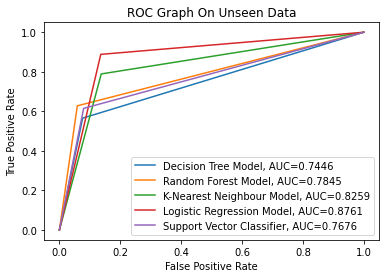

In [124]:
plt.figure(0).clf()
fpr, tpr, _ = metrics.roc_curve(y_test, y_tree_test)
auc = round(metrics.roc_auc_score(y_test, y_tree_test), 4)
plt.plot(fpr,tpr,label="Decision Tree Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_forest_test)
auc = round(metrics.roc_auc_score(y_test, y_forest_test), 4)
plt.plot(fpr,tpr,label="Random Forest Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_KNN_test)
auc = round(metrics.roc_auc_score(y_test, y_KNN_test), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbour Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_log_test)
auc = round(metrics.roc_auc_score(y_test, y_log_test), 4)
plt.plot(fpr,tpr,label="Logistic Regression Model, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_svc_test)
auc = round(metrics.roc_auc_score(y_test, y_svc_test), 4)
plt.plot(fpr,tpr,label="Support Vector Classifier, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Graph On Unseen Data")
plt.legend()

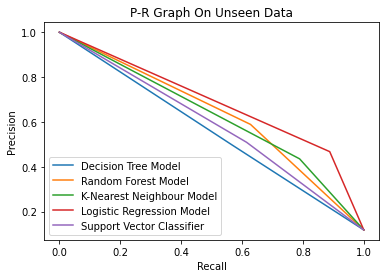

In [125]:
plt.figure(0).clf()

precisions, recalls, thresholds = metrics.precision_recall_curve (y_test, y_tree_test)
plt.plot(recalls,precisions,label="Decision Tree Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_test, y_forest_test)
plt.plot(recalls,precisions,label="Random Forest Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_test, y_KNN_test)
plt.plot(recalls,precisions,label="K-Nearest Neighbour Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_test, y_log_test)
plt.plot(recalls,precisions,label="Logistic Regression Model")

precisions, recalls, thresholds = metrics.precision_recall_curve (y_test, y_svc_test)
plt.plot(recalls,precisions,label="Support Vector Classifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Graph On Unseen Data")
plt.legend()

### Fine-tune the model using Grid Search¶
In this assignment, we decided to use Random Forest Model as our final model because it’s both precision and recall score are equally higher and have a relatively high f1 score

1. n_estimators: [20, 40, 60] 
2. max_features: [4, 6, 8, 10]
3. max_depth   : [4, 6, 8]

In [126]:
# Perform Grid Search
# Create a new pipeline because we had perform testing using the forest pipeline before
imba_pipeline_forest = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators = 60, random_state = 42))

forest_para = { 
    'n_estimators': [20, 40, 60],
    'max_features': [4, 6, 8, 10],
    'max_depth' : [4, 6, 8]
}

new_params = {'randomforestclassifier__' + key: forest_para[key] for key in forest_para}
grid_forest = GridSearchCV(imba_pipeline_forest, param_grid=new_params, cv=5, scoring='precision')
grid_forest.fit(x_train_tr, y_train)

# Show the best parameters, score that found by using grid search
print('Best Parameter:', grid_forest.best_params_)
print('Best Score', grid_forest.best_score_)

Best Parameter: {'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__n_estimators': 60}
Best Score 0.46396454458925385


In [127]:
final_forest_model = grid_forest.best_estimator_
final_forest_model

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, max_features=10,
                                        n_estimators=60, random_state=42))])

In [128]:
final_model = RandomForestClassifier(max_depth=8, max_features=10, n_estimators=60, random_state=42)
final_model.fit(x_train_tr, y_train)
importances = final_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in final_model.estimators_], axis=0)

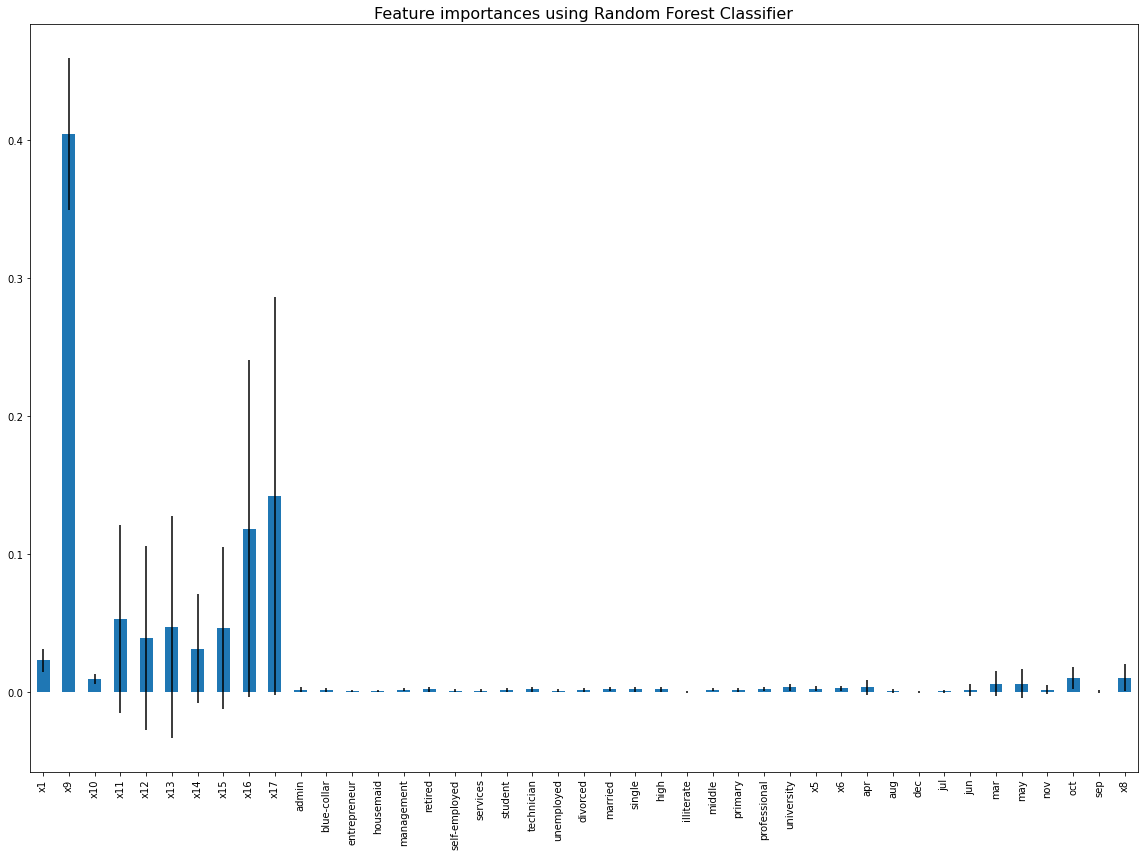

In [129]:
# Get the feature importances when using Random Forest Classifier
feature_names = [x_columns_name[i] for i in range(x_columns_name.shape[0])]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize = (16,12))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Random Forest Classifier", fontsize=16)
fig.tight_layout()

In [130]:
forest_importances.sort_values(inplace=True, ascending=False)
print(forest_importances)

x9               0.404398
x17              0.142221
x16              0.118567
x11              0.053063
x13              0.047524
x15              0.046498
x12              0.039303
x14              0.031627
x1               0.023162
x8               0.010677
oct              0.010316
x10              0.009618
mar              0.006339
may              0.006283
apr              0.003747
university       0.003498
x6               0.002838
x5               0.002570
married          0.002272
retired          0.002257
high             0.002248
technician       0.002239
professional     0.002170
single           0.002068
middle           0.001987
primary          0.001960
nov              0.001946
admin            0.001929
management       0.001854
blue-collar      0.001810
jun              0.001669
student          0.001609
divorced         0.001588
services         0.001243
self-employed    0.001113
entrepreneur     0.000996
unemployed       0.000988
aug              0.000964
jul         

# 4.0 Evaluate the final model on unseen data

In [131]:
y_forest_test = final_forest_model.predict(x_test_tr) # fit on test set
print('Test accuracy = {:.4f}'.format(accuracy_score(y_test, y_forest_test)))
print('Test precision = {:.4f}'.format(precision_score(y_test, y_forest_test)))
print('Test recall = {:.4f}'.format(recall_score (y_test, y_forest_test)))
print('Test f1 score = {:.4f}'.format(f1_score(y_test, y_forest_test)))

Test accuracy = 0.8661
Test precision = 0.4664
Test recall = 0.9069
Test f1 score = 0.6160
